In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
# df = pd.read_parquet("output/compute_statistics_over_chromosome/gonzalobenegas/gpn-brassicales/GCF_000001735.4/NC_003076.8/statistics_over_chromosome.parquet")
df = pd.read_parquet("output/compute_distribution_shift_over_chromosome/gonzalobenegas/gpn-brassicales/GCF_000001735.4/NC_003076.8/distribution_shift_over_chromosome.parquet")


In [4]:
df

,position,threshold_steps,feature
0,22845526,460,region
1,3795067,210,intron
2,10701971,50,region
3,18897791,470,CDS
4,21303223,160,region
...,...,...,...
9995,17334090,260,region
9996,3534271,220,intron
9997,145863,320,exon
9998,16372906,130,region


In [5]:
df["row"] = df.groupby("feature").cumcount()

In [6]:
wide = (
    df.pivot(index="row", columns="feature", values="threshold_steps")
      .sort_index(axis=1)          # optional: sort columns alphabetically
)

In [7]:
wide

feature,CDS,exon,gene,intron,mRNA,miRNA,pseudogene,region,sequence_feature,transcript
row,,,,,,,,,,
0,470.0,180.0,240.0,210.0,180.0,370.0,70.0,460.0,180.0,140.0
1,260.0,350.0,340.0,250.0,320.0,NaN,350.0,50.0,NaN,NaN
2,370.0,280.0,150.0,220.0,290.0,NaN,540.0,160.0,NaN,NaN
3,320.0,240.0,270.0,290.0,290.0,NaN,180.0,40.0,NaN,NaN
4,270.0,390.0,230.0,100.0,280.0,NaN,400.0,200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN
3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN,NaN
3604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN


In [8]:
# keep only populations with N >= 100
wide = wide.loc[:, wide.count() >= 100]

In [9]:
wide

feature,CDS,exon,gene,intron,pseudogene,region
row,,,,,,
0,470.0,180.0,240.0,210.0,70.0,460.0
1,260.0,350.0,340.0,250.0,350.0,50.0
2,370.0,280.0,150.0,220.0,540.0,160.0
3,320.0,240.0,270.0,290.0,180.0,40.0
4,270.0,390.0,230.0,100.0,400.0,200.0
...,...,...,...,...,...,...
3602,NaN,NaN,NaN,NaN,NaN,110.0
3603,NaN,NaN,NaN,NaN,NaN,270.0
3604,NaN,NaN,NaN,NaN,NaN,260.0


In [10]:
from scipy.stats import shapiro

for col in wide.columns:
    print(f"checking {col}")
    # Check normality
    stat, p = shapiro(wide[col].values, nan_policy="omit")
    print(f"Shapiro - Wilk test for {col}: statistic={stat}, p - value={p}")

checking CDS
Shapiro - Wilk test for CDS: statistic=0.9901417134078753, p - value=7.138354224420246e-08
checking exon
Shapiro - Wilk test for exon: statistic=0.9905649072383853, p - value=4.8613808294285357e-11
checking gene
Shapiro - Wilk test for gene: statistic=0.9840073468299668, p - value=0.0048288176086105404
checking intron
Shapiro - Wilk test for intron: statistic=0.9614292976335532, p - value=2.408395555733587e-21
checking pseudogene
Shapiro - Wilk test for pseudogene: statistic=0.9731526083014437, p - value=3.325226472997479e-10
checking region
Shapiro - Wilk test for region: statistic=0.9597978985986565, p - value=1.6520063897791486e-30


In [11]:
from scipy.stats import anderson

# anderson(wide["CDS"].values)


for col in wide.columns:
    print(f"checking {col}")
    print(anderson(wide[col].values))

checking CDS
AndersonResult(statistic=nan, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=nan, scale=nan)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')
checking exon
AndersonResult(statistic=nan, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=nan, scale=nan)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')
checking gene
AndersonResult(statistic=nan, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=nan, scale=nan)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')
checking intron
AndersonResult(stat

<Axes: ylabel='Frequency'>

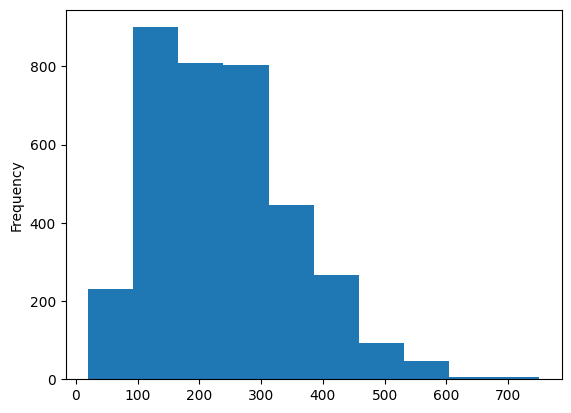

In [12]:
wide["region"].plot(kind="hist")

<Axes: ylabel='Frequency'>

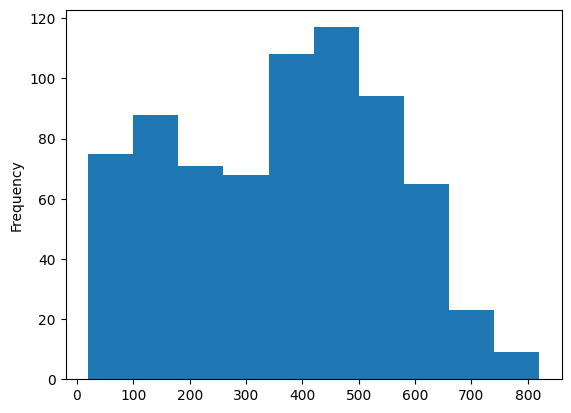

In [21]:
wide["pseudogene"].plot(kind="hist")

<Axes: ylabel='Frequency'>

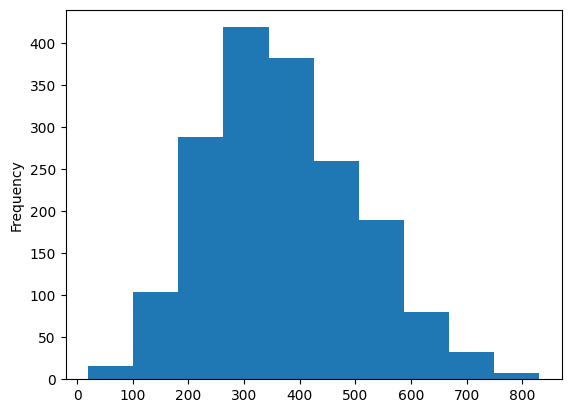

In [22]:
wide["intron"].plot(kind="hist")

<Axes: ylabel='Frequency'>

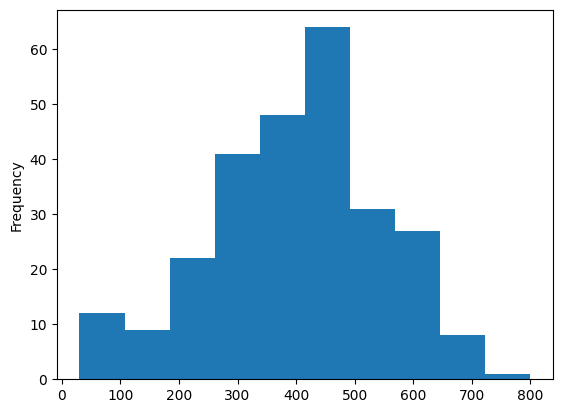

In [23]:
wide["gene"].plot(kind="hist")

<Axes: ylabel='Frequency'>

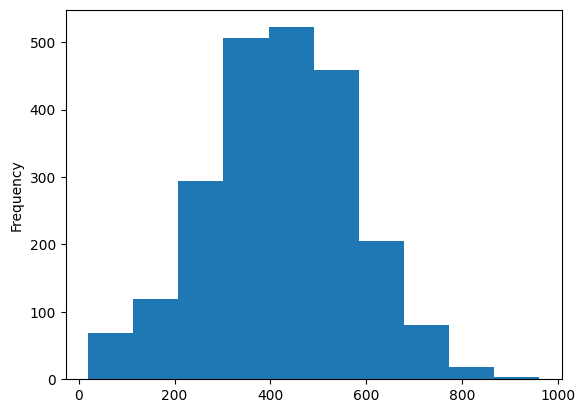

In [24]:
wide["exon"].plot(kind="hist")

<Axes: ylabel='Frequency'>

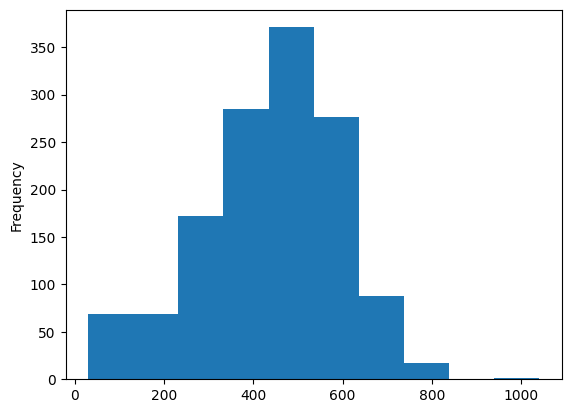

In [25]:
wide["CDS"].plot(kind="hist")